In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from stabda.utils import xr_load, get_results_path, get_distr_on_times

In [3]:
results_path = get_results_path()
filename = 'distance_distr_10.nc'
filepath = os.path.join(results_path, filename)

results = xr_load(filepath)

distr_starts = get_distr_on_times()

In [4]:
def plot_dist_distr(res):
    plt.style.use('sci_style.py')
    fig, ax = plt.subplots(2, 3, figsize=(20,7), sharey=True)
    delays = res.delay.data
    x = np.arange(-2000, 5001) / 1000
    ax = ax.ravel()

    samp_color = 'g'
    test_color = 'b'
    dis_color = 'k'

    alpha_box = 0.2
    sample_on = 2000

    x = np.arange(-2000, 5001) / 1000
    for i, delay in enumerate(delays):
        bs = res.loc[:,delay,:].data
        bsavg = bs.reshape(1000, 6, -1).mean(1)
        baseline = bsavg.mean(0)[sample_on-10]
        ys = np.sort(bsavg, axis=0) - baseline
        lci = ys[25,:] 
        uci = ys[975,:] 
        
        distr_start = distr_starts[delay]

        y = bsavg.mean(0) - baseline

        test_start = ((delay*1000)+500 ) * 1e-3

        ax[i].plot(x, y, 'k')
        ax[i].fill_between(x, lci, uci, color='k', alpha=0.3)
        ax[i].axhline(0, color='r')
        ax[i].axvspan(0,0.500, color=samp_color, alpha=alpha_box)
        ax[i].axvspan(distr_start,distr_start+0.25, color=dis_color, alpha=alpha_box)
        ax[i].axvspan(test_start, test_start+0.500, color=test_color, alpha=alpha_box)
        ax[i].set_title(f'Delay = {delay}')
        if i >= 2:
            ax[i].set_xlabel('Time (s)')

        if i == 0 or i == 3:
            ax[i].set_ylabel('Distance')
        if i < 2:
            ax[i].set_xticklabels([])
        ax[i].set_xlim([-.2, 5])

    ax[5].set_visible(False)
    #     plt.show()
    plt.tight_layout()

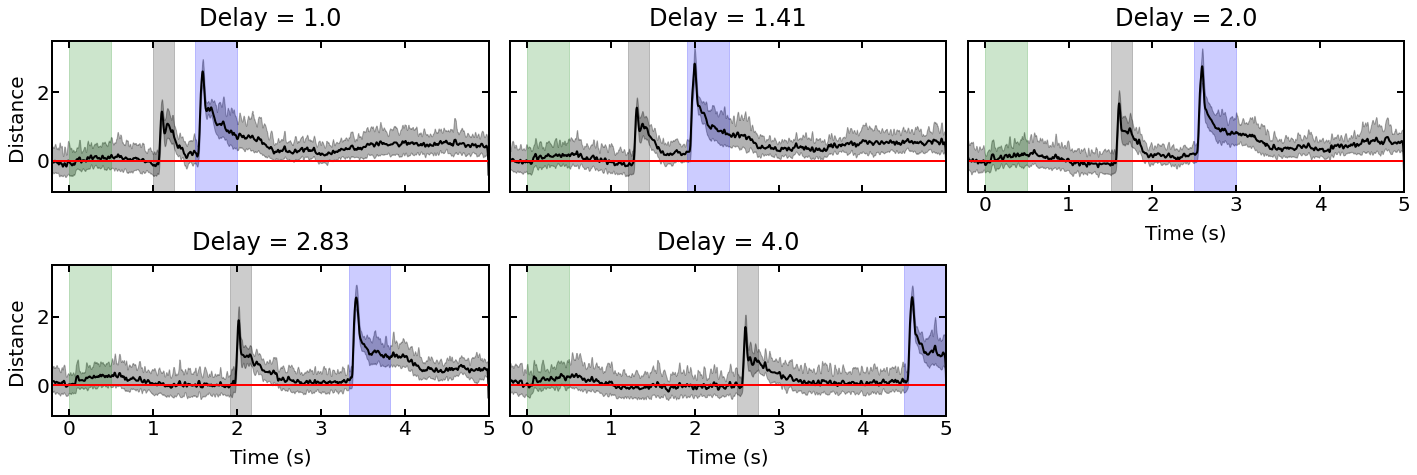

In [5]:
plot_dist_distr(results)
plt.savefig(f'figures/distance_distr.png', dpi=300)